(600.0, 0.0)

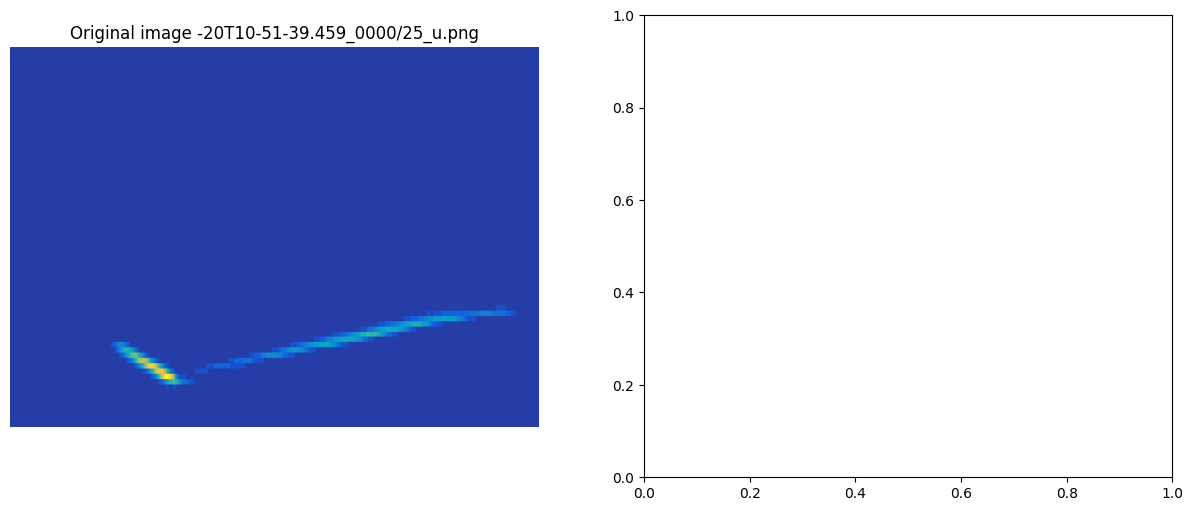

In [4]:
from matplotlib import cm
import numpy as np
import requests
import matplotlib.pyplot as plt

from src.openImage import openImage


image_path = "/media/gant/Expansion/tpc_root_raw/DATA_ROOT/cleanimages2/"
image_name = "CoBo_2018-06-20T10-51-39.459_0000/25"

path_and_name_input = image_path + image_name + "_u.png"

test_image = openImage(path_and_name_input)
test_image.readImage()

original_image = test_image.m_data

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
ax = axes.ravel()

ax[0].imshow(original_image)
ax[0].set_title("Original image " + path_and_name_input[70:])
ax[0].set_axis_off()
ax[0].set_ylim(600, 0)


url = "http://localhost:1234"
with open(path_and_name_input, "rb") as image_file:
    image_bytes = image_file.read()

response = requests.post(
    url,
    files={"image": image_bytes},
    headers={"Content-Type": "application/octet-stream"},
)

if response.status_code == 200:
    # Print the model's response
    print("Response from LLaVA model:", response.text)
else:
    print(f"Failed to get response. Status code: {response.status_code}")
    print("Response content:", response.content)